In [21]:
#OD for oriel data
OD <- read.csv("oriel2526.csv")
library(dplyr)
library(ggplot2)

In [22]:
OD <- as.data.frame(OD) 

names(OD)[names(OD) == "Salary...."] <- "Salary"
names(OD)[names(OD) == "Skilled.worker.visa"] <- "Visa"
names(OD)[names(OD) == "Hours.per.Week"] <- "Working.hours"
names(OD)[names(OD) == "Practice.Placement.Rotation.Setting.1"] <- "Rotation1"
names(OD)[names(OD) == "Length.of.Placement.Rotation.1..weeks."] <- "Rotation1.duration"
names(OD)[names(OD) == "Practice.Placement.Rotation.Setting.2"] <- "Rotation2"
names(OD)[names(OD) == "Length.of.Placement.Rotation.2..weeks."] <- "Rotation2.duration"
names(OD)[names(OD) == "Practice.Placement.Rotation.Setting.3"] <- "Rotation3"
names(OD)[names(OD) == "Length.of.Placement.Rotation.3..weeks."] <- "Rotation3.duration"
names(OD)[names(OD) == "Practice.Placement.Rotation.Setting.4"] <- "Rotation4"
names(OD)[names(OD) == "Length.of.Placement.Rotation.4..weeks."] <- "Rotation4.duration"

colnames(OD)
dim(OD)  

#Classify the type of training
OD$Training.type <- ifelse(OD$Rotation1.duration >= OD$Rotation2.duration + 13, "Non-split", 
                                      ifelse(OD$Rotation1.duration == OD$Rotation2.duration, "Split", "Other"))


[1] "Programme.SystemID"                      
 [2] "Recruitment.Office"                      
 [3] "Region"                                  
 [4] "Sub.Region"                              
 [5] "Sector"                                  
 [6] "Post.Type"                               
 [7] "Programme.Preference"                    
 [8] "Abbreviation"                            
 [9] "Programme.Title"                         
[10] "Programme.Description"                   
[11] "Places.Available"                        
[12] "Start.Date"                              
[13] "Employer.Type"                           
[14] "Employer.Name"                           
[15] "Size.of.organisation..Primary.care.only."
[16] "Specialties..Hospital.only."             
[17] "Visa"                                    
[18] "Number.of.Licences"                      
[19] "Salary"                                  
[20] "Training.Provider"                       
[21] "Employer.website"                        
[22] "Working.hours"                           
[23] "ProgrammeNumber"                         
[24] "ProgrammeName"                           
[25] "ICB.Name"                                
[26] "Pharmacy.Programme.Number"               
[27] "Number.of.Placements.Rotations"          
[28] "Rotation1"                               
[29] "Rotation1.duration"                      
[30] "Rotation2"                               
[31] "Rotation2.duration"                      
[32] "Rotation3"                               
[33] "Rotation3.duration"                      
[34] "Rotation4"                               
[35] "Rotation4.duration"                      
[36] "Placement.Rotation.1..SystemID"          
[37] "Placement.Rotation.2..SystemID"          
[38] "Placement.Rotation.3..SystemID"          
[39] "Placement.Rotation.4..SystemID"

[1] 3923   39

In [23]:
keeps <- c("Training.type","Employer.Type", "Region", "Sector", "Programme.Title", "Visa", "Salary", "Places.Available", "Working.hours",
           "Rotation1", "Rotation1.duration", "Rotation2", "Rotation2.duration", "Rotation3", "Rotation3.duration", "Rotation4", "Rotation4.duration")
           
OD <- OD[keeps]
colnames(OD)
OD$Hourly.Wage <- OD$Salary/52/OD$Working.hours
OD$Visa <- as.factor(OD$Visa)

[1] "Training.type"      "Employer.Type"      "Region"            
 [4] "Sector"             "Programme.Title"    "Visa"              
 [7] "Salary"             "Places.Available"   "Working.hours"     
[10] "Rotation1"          "Rotation1.duration" "Rotation2"         
[13] "Rotation2.duration" "Rotation3"          "Rotation3.duration"
[16] "Rotation4"          "Rotation4.duration"

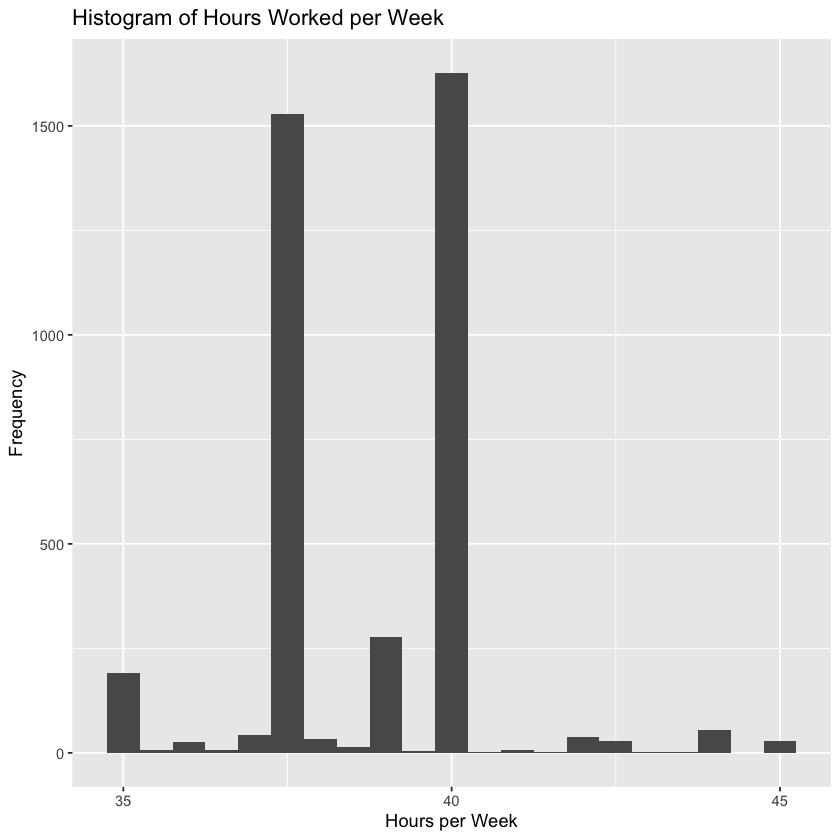

In [24]:
library(ggplot2)

# Define the plot for Hours Worked per Week
hours.worked.plot <- ggplot(OD, aes(x = Working.hours)) + 
  geom_histogram(binwidth = 0.5) + 
  ggtitle("Histogram of Hours Worked per Week") + 
  xlab("Hours per Week") + 
  ylab("Frequency") +
  scale_x_continuous(breaks = seq(0, max(OD$Working.hours, na.rm = TRUE), by = 5))

# Display the plot
hours.worked.plot


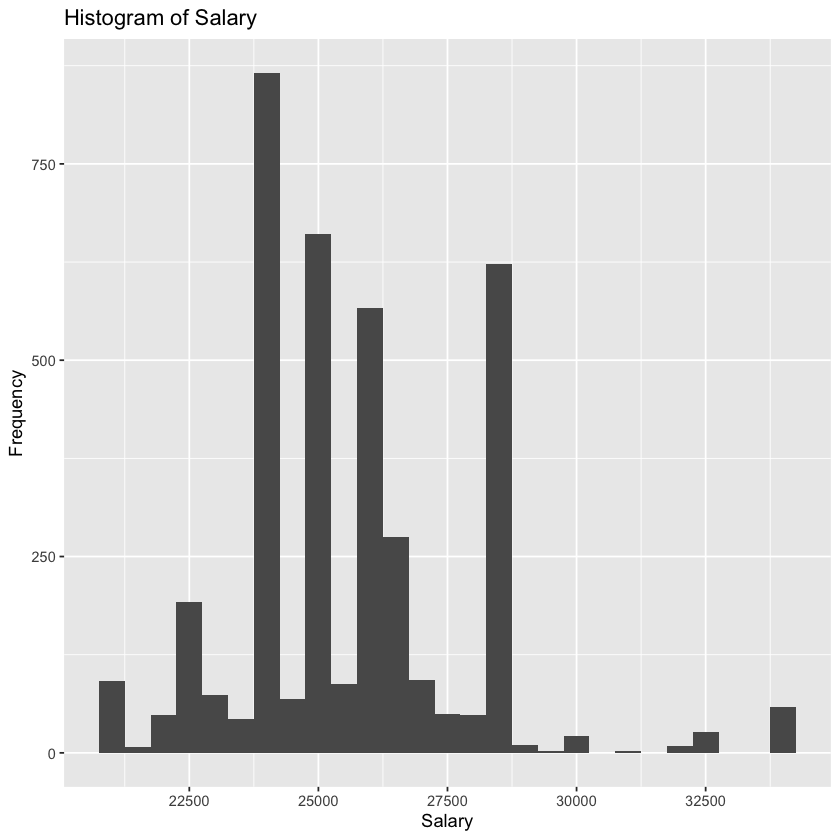

In [25]:
# Define the plot for Salary with meaningful intervals
salary.plot <- ggplot(OD, aes(x = Salary)) + 
  geom_histogram(binwidth = 500) + 
  ggtitle("Histogram of Salary") + 
  xlab("Salary") + 
  ylab("Frequency") +
  scale_x_continuous(breaks = seq(20000, max(OD$Salary, na.rm = TRUE), by = 2500))

# Display the plot
salary.plot


In [26]:
community.pharmacy.average.salary <- mean(OD$Salary[OD$Employer.Type == "Primary Care"], na.rm = TRUE)
community.pharmacy.average.salary
community.min.salary <- min(OD$Salary[OD$Employer.Type == "Primary Care"], na.rm = TRUE)
community.max.salary <- max(OD$Salary[OD$Employer.Type == "Primary Care"], na.rm = TRUE)
paste0("The average salary for community pharmacy is ", community.pharmacy.average.salary, " with a minimum of ", community.min.salary, " and a maximum of ", community.max.salary)

hospital.pharmacy.average.salary <- mean(OD$Salary[OD$Employer.Type == "Hospital"], na.rm = TRUE)
hospital.pharmacy.average.salary
hospital.min.salary <- max(OD$Salary[OD$Employer.Type == "Hospital"], na.rm = TRUE)
hospital.max.salary <- max(OD$Salary[OD$Employer.Type == "Hospital"], na.rm = TRUE)
paste0("The average salary for hospital pharmacy is ", hospital.pharmacy.average.salary, " with a minimum of ", hospital.min.salary, " and a maximum of ", hospital.max.salary)


[1] 24929.77

[1] "The average salary for community pharmacy is 24929.7673853629 with a minimum of 20821 and a maximum of 32000"

[1] 29033.3

[1] "The average salary for hospital pharmacy is 29033.3015873016 with a minimum of 34098 and a maximum of 34098"

TODO
- Fix the hospital salary min and max
- Get min community place
- Get max/min hourly and plot
- Find a better theme